###### Algorithm to plot the spin projection in the Z axis for each gamma varying the thin films thickness. The algorithm also plots the histogram of the spin projection for each gamma. The simulation was made using a constant anisotropy K = 0.1, and changing a parameter Gamma (0.037, 0.111, 0.333, 1.000, 3.000 and 9.000) related with the superficial anisotropy. The thickness used in the simulation were d = 2, 4, 6, 8, 10, 12, 14 and 16.

In [27]:
#%matplotlib inline

# Files management

In [28]:
import glob
import re
import collections
import os

In [29]:
# Glob sirve para buscar archivos
files = {g: sorted(glob.glob('../d*/k0.1/gamma%s/EstFinal.dat' % g)) for g in ('0.037', '0.111', '0.333', '1.000', '3.000', '9.000')}
files = collections.OrderedDict(sorted(files.items()))

filename = re.compile(r'../d(?P<d>\d+)/k[0-9.]+/gamma[0-9.]+/EstFinal.dat')

for gamma, filenames in files.items():
    for file in filenames:
        match = filename.match(file)
        
os.makedirs('../04ZSpinProjection')
os.makedirs('../05HistogramZSpinProjection')

###### The file 'EstFinal.dat' contains the following columns with information
- X position
- Y position
- Z position
- Boundarie flag
- Spin projection X
- Spin projection Y
- Spin projection Z

# Importing Modules

In [30]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import loadtxt
from scipy.optimize import curve_fit
from matplotlib import pylab

###### Ploting Mean Spin Z projection vs Thickness for each gamma

Nombre archivo 0.037
02 0.2112882 

Nombre archivo 0.037
08 -0.3680459 

Nombre archivo 0.037
16 0.32647355 

Nombre archivo 0.111
02 0.3183746 

Nombre archivo 0.111
08 -0.2545014 

Nombre archivo 0.111
16 -0.102106175 

Nombre archivo 0.333
02 -0.586695 

Nombre archivo 0.333
08 0.1670944 

Nombre archivo 0.333
16 -0.0246886 

Nombre archivo 1.000
02 0.5506908 

Nombre archivo 1.000
08 0.23731705 

Nombre archivo 1.000
16 -0.05970415 



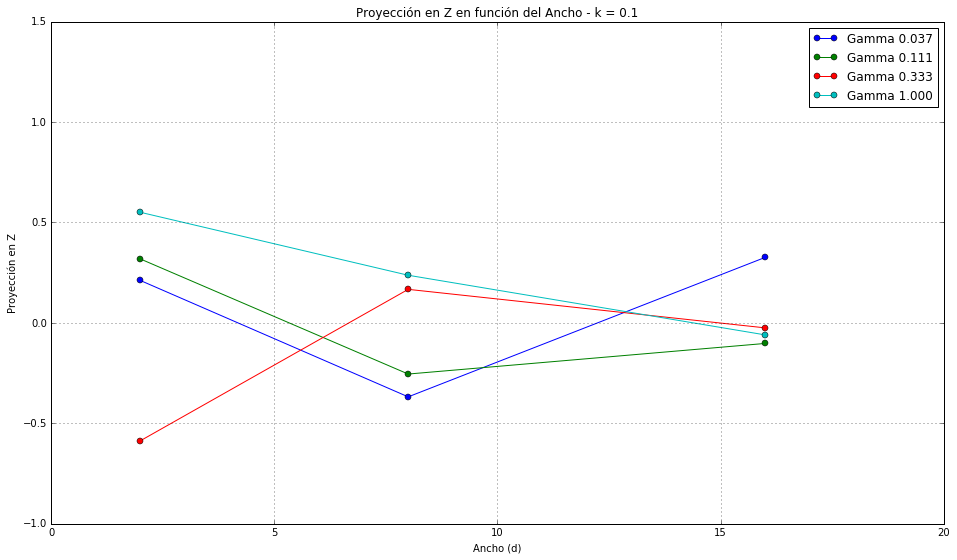

In [31]:
plt.figure(figsize=(16,9))

for gamma in files:
    Thickness = []
    ProyZ = []
    for file in files[gamma]:

        Sz = loadtxt(file, usecols=(6,), unpack=True)
        SzMean = np.mean(Sz)
        d = filename.match(file).groupdict()['d']

        Thickness.append(d)
        ProyZ.append(SzMean)
        
        print('Nombre archivo', gamma)
        print(d, SzMean, "\n")

    if len(Thickness) != 0:
        plt.plot(Thickness, ProyZ, '-o', label = "Gamma {}".format(gamma))
        plt.axis([0, 20, -1, 1.5])

plt.legend(loc=0)
plt.xlabel('Ancho (d)')
plt.ylabel('Proyección en Z')
plt.title('Proyección en Z en función del Ancho - k = 0.1')
plt.grid(True)
plt.savefig('../04ZSpinProjection/03a_Graph_k01_Mean_Z_projection.png')
plt.close()

###### Ploting the histogram of each Z projection for each gamma and each thickness

/home/juanhenao/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


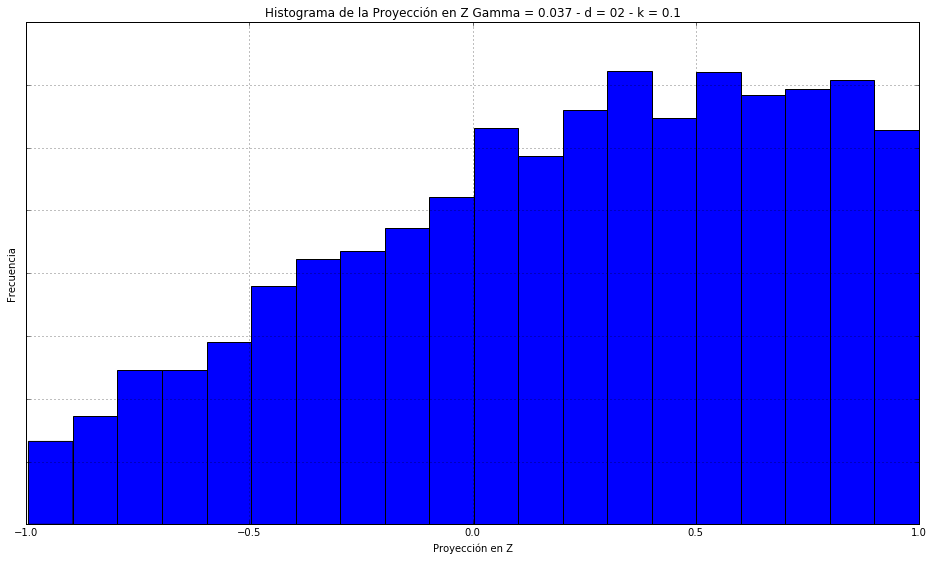

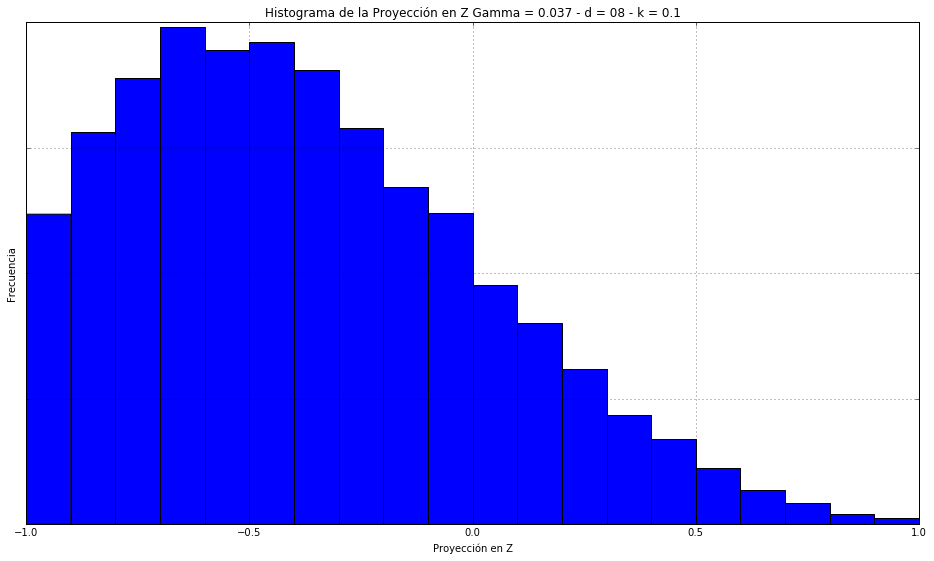

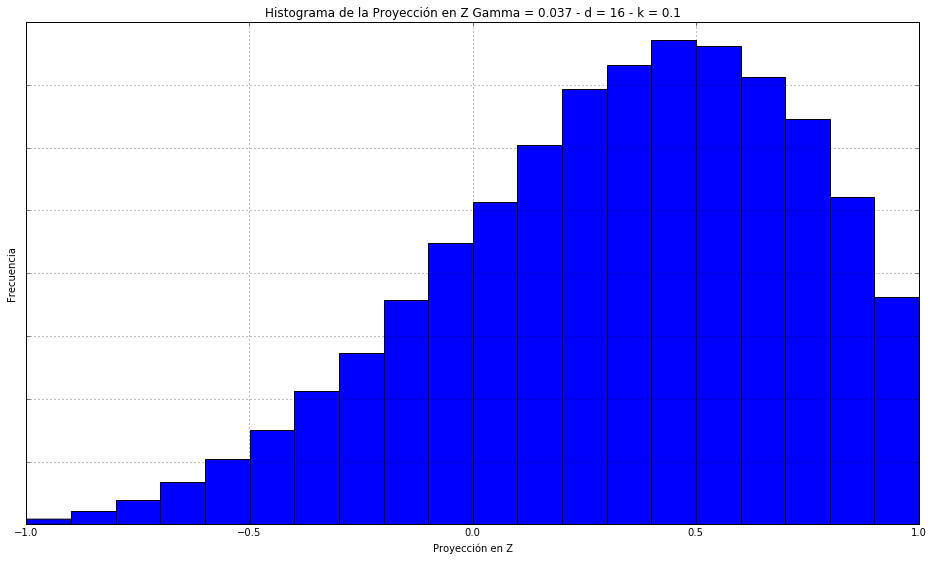

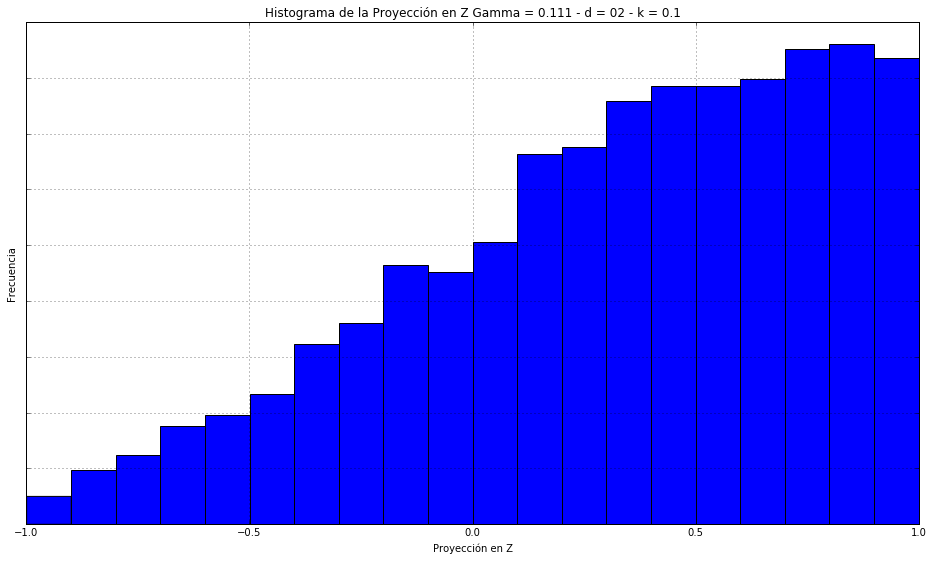

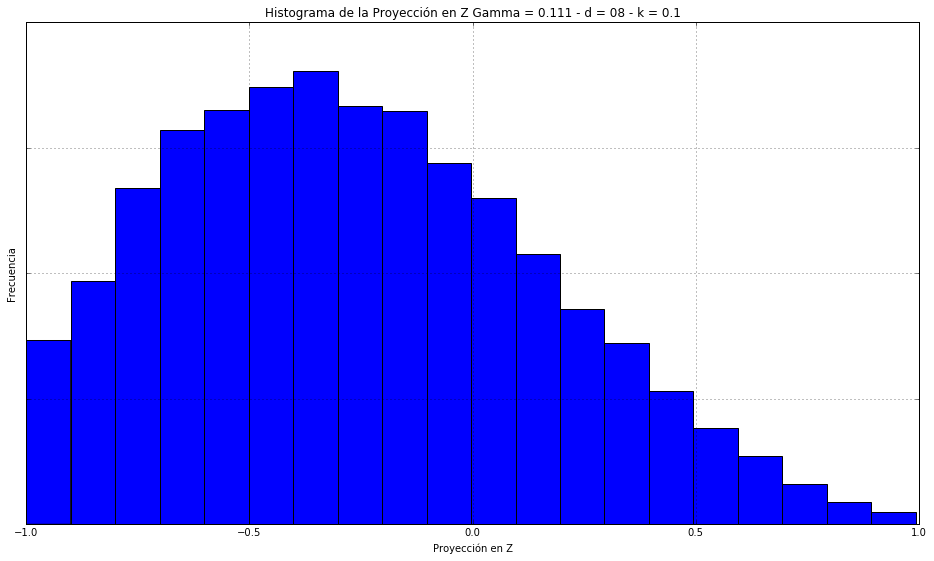

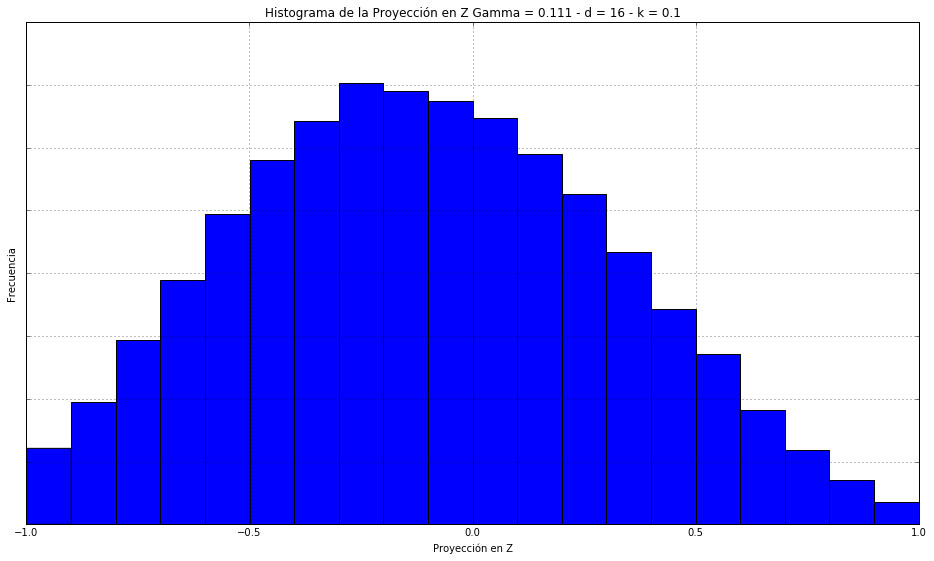

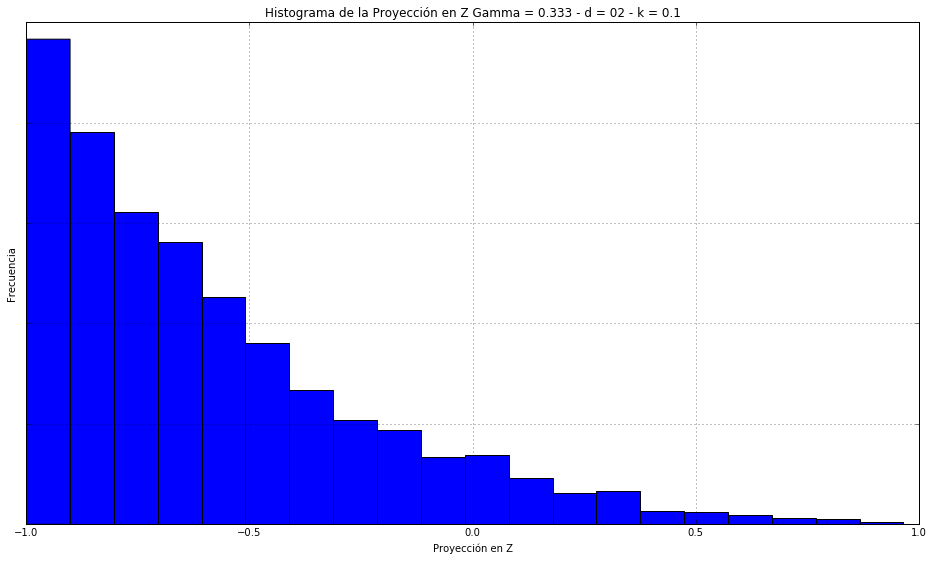

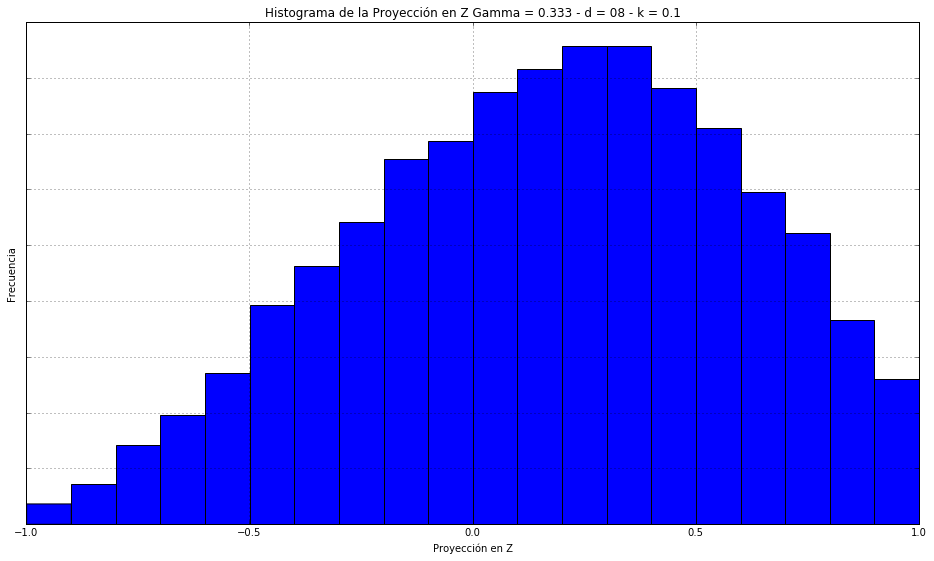

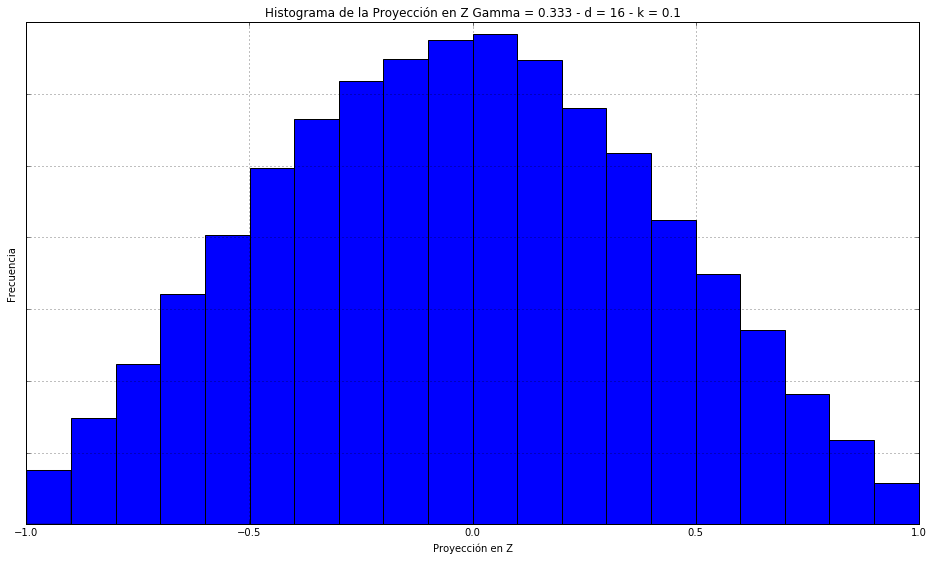

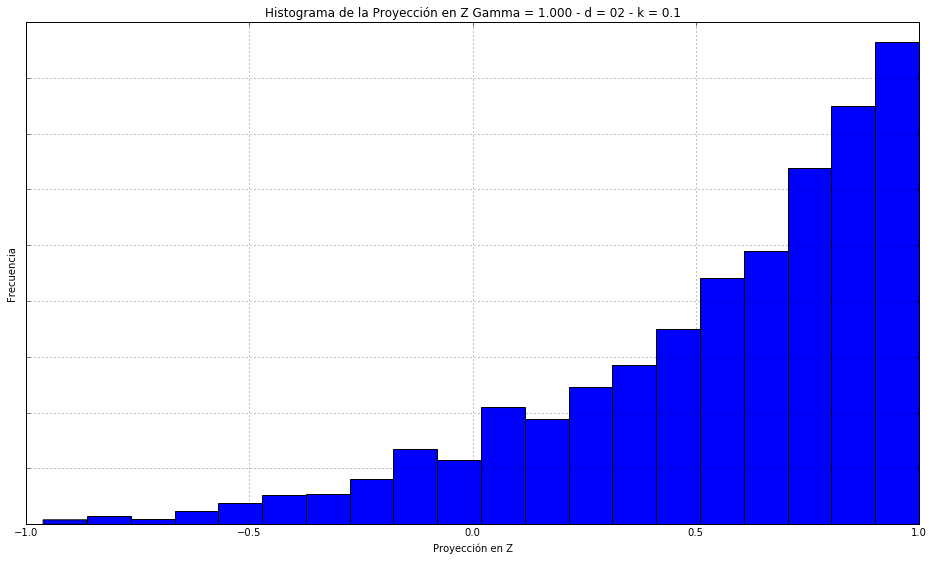

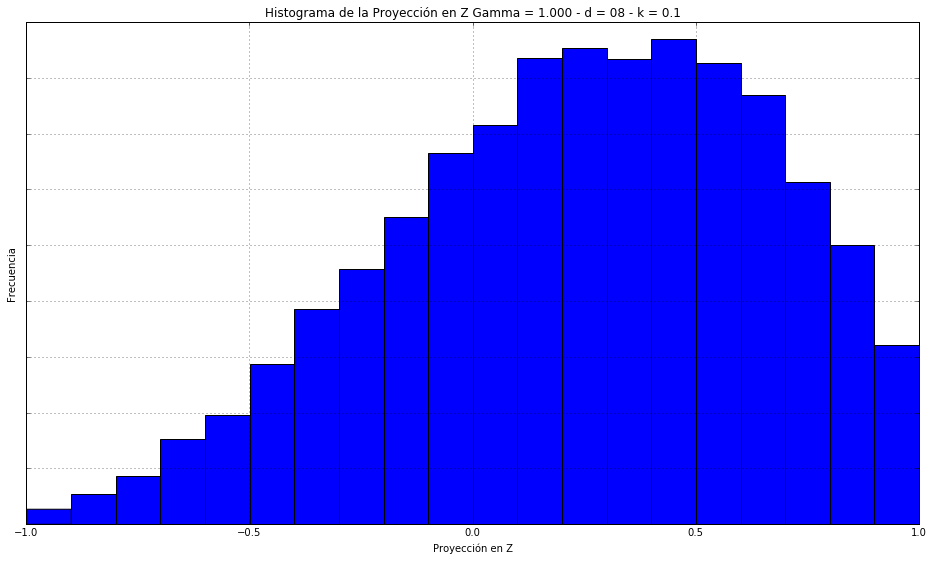

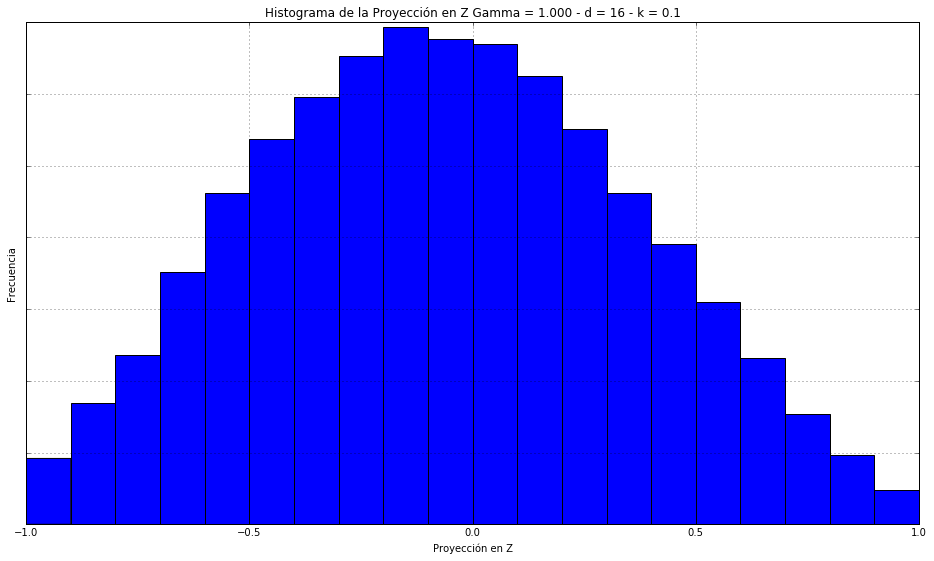

In [32]:
for gamma in files:
    for file in files[gamma]:
        plt.figure(figsize=(16,9))

        Sz = loadtxt(file, usecols=(6,), unpack=True)
        d = filename.match(file).groupdict()['d']
                
        plt.hist(Sz, bins=20)   
        plt.legend(loc=0)
        plt.xlabel('Proyección en Z')
        plt.ylabel('Frecuencia')
        frame = pylab.gca()
        frame.axes.get_yaxis().set_ticklabels([])
        plt.title('Histograma de la Proyección en Z Gamma = %s - d = %s - k = 0.1' % (gamma, d))
        plt.grid(True)
        plt.savefig('../05HistogramZSpinProjection/03a_Hist_k01_Z_projection_gamma%s_d%s.png' % (gamma,d))
        plt.close()